In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
dataset_path = "/content/drive/My Drive/lstm assginemtn/CC_usecase1.csv"

In [3]:
# Reading the data set and it's Descriptions

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(dataset_path)

In [6]:
print('The shape of the train dataset is {}'.format(df.shape))

The shape of the train dataset is (1502, 2)


In [7]:
print("Features in the Dataset : " , list(df.columns))

Features in the Dataset :  ['Construction Description', 'Construction Code']


In [8]:
df.describe()

,Construction Description,Construction Code
count,1502,1502
unique,1493,7
top,Mod fire resistive,4
freq,2,688


In [9]:
df.head(3)

,Construction Description,Construction Code
0,"metal roof, wood floors, stucco interior and e...",1
1,"70% Frame, 30% Masonry Veneer",1
2,ALL COMB (WOOD FRAME),1


In [10]:
df["Construction Code"].value_counts()

4          688
2          282
3          197
1          168
6          101
5           65
Unknown      1
Name: Construction Code, dtype: int64

In [11]:
print("Data set Full Info: \n")
df.info()

Data set Full Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Construction Description  1502 non-null   object
 1   Construction Code         1502 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB


In [12]:
print("Null values in Target variable : " , df["Construction Code"].isna().sum())

Null values in Target variable :  0


In [13]:
print("Uniques values in dataset according to each column : ")
print(df.nunique(dropna=False))

Uniques values in dataset according to each column : 
Construction Description    1493
Construction Code              7
dtype: int64


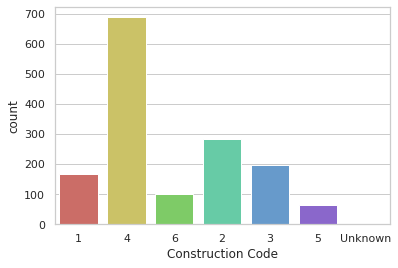

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x = "Construction Code", data = df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [15]:
#### Method too know how the descriptions are look like

def print_description(index):
    example = df[df.index == index][['Construction Description', 'Construction Code']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Construction Code:', example[1])

print_description(5)
print_description(10)

brick and stucco
Construction Code: 1
Drywall Over Metal Studs
Construction Code: 1


Data Preprocssing using NLTK 

In [16]:
# Expanding words in the Description Ex: I've = I have 
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [17]:
df['Clean_text'] = df['Construction Description'].map(lambda com : clean_text(com))

In [18]:
df.head(3)

,Construction Description,Construction Code,Clean_text
0,"metal roof, wood floors, stucco interior and e...",1,metal roof wood floors stucco interior and ext...
1,"70% Frame, 30% Masonry Veneer",1,70 frame 30 masonry veneer
2,ALL COMB (WOOD FRAME),1,all comb wood frame


In [19]:
!pip install autocorrect

In [20]:
!pip install contractions

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from autocorrect import spell
import contractions


snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

In [20]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
def word_tokenize(text):
        """
        :param text:
        :return: list of words
        """
        return [w for sent in nltk.sent_tokenize(text) for w in nltk.word_tokenize(sent)]

In [22]:
def to_lower(text):
        """
        :param text:
        :return:
            Converted text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
        """
        return text.lower()

In [23]:
def lemmatize(text):

        lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(lemmatized_word)

In [24]:
def remove_punct(text):
        return ''.join(c for c in text if c not in punctuation)

In [25]:
def remove_numbers(text):
        """
        take string input and return a clean text without numbers.Use regex to discard the numbers.
        """
        output = ''.join(c for c in text if not c.isdigit())
        return output

In [26]:
def remove_stopwords(sentence):
        """
        removes all the stop words like "is,the,a, etc."
        """
        stop_words = stopwords.words('english')
        return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [27]:
def pre_processing(text):
    clean_text = remove_stopwords(text) 
    clean_text = remove_numbers(clean_text)
    clean_text = remove_punct(clean_text)
    clean_text = lemmatize(clean_text)
    clean_text = to_lower(clean_text)
    clean_text = word_tokenize(clean_text)

    return clean_text

In [28]:
df['Clean_text'] = df['Construction Description'].apply(pre_processing)

In [29]:
df.head(3)

,Construction Description,Construction Code,Clean_text
0,"metal roof, wood floors, stucco interior and e...",1,"[metal, roof, wood, floor, stucco, interior, e..."
1,"70% Frame, 30% Masonry Veneer",1,"[frame, masonry, veneer]"
2,ALL COMB (WOOD FRAME),1,"[all, comb, wood, frame]"


In [30]:
def clean_text(text):
    return len(text)

df['count_of_words'] = df['Clean_text'].map(lambda com : clean_text(com))

In [31]:
df.head(3)

,Construction Description,Construction Code,Clean_text,count_of_words
0,"metal roof, wood floors, stucco interior and e...",1,"[metal, roof, wood, floor, stucco, interior, e...",8
1,"70% Frame, 30% Masonry Veneer",1,"[frame, masonry, veneer]",3
2,ALL COMB (WOOD FRAME),1,"[all, comb, wood, frame]",4


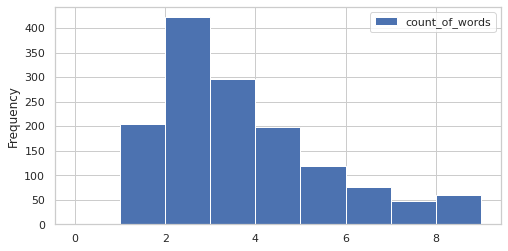

In [32]:
lens = df["count_of_words"]
lens.plot(kind='hist', bins = np.arange(start = 0, stop = 10, step = 1), figsize = [8,4],  legend = True)

In [33]:
print(df["count_of_words"].median())

3.0


In [34]:
print("Maximum Number of word in a Discription : " , df["count_of_words"].max())
print("Minimum Number of word in a Discription : " , df["count_of_words"].min())

Maximum Number of word in a Discription :  55
Minimum Number of word in a Discription :  0


In [35]:
def pre_processing(text):
    clean_text = remove_stopwords(text) 
    clean_text = remove_numbers(clean_text)
    clean_text = remove_punct(clean_text)
    clean_text = lemmatize(clean_text)
    clean_text = to_lower(clean_text)
    #clean_text = word_tokenize(clean_text)

    return clean_text
df["letter_count"] = df['Construction Description'].apply(pre_processing)
print("Maximum Number of letters in a Discription : " , df["Construction Description"].str.len().max())
print("Minimum Number of letters in a Discription : " , df["Construction Description"].str.len().min())

Maximum Number of letters in a Discription :  456
Minimum Number of letters in a Discription :  1


In [36]:
df.head(3)

,Construction Description,Construction Code,Clean_text,count_of_words,letter_count
0,"metal roof, wood floors, stucco interior and e...",1,"[metal, roof, wood, floor, stucco, interior, e...",8,metal roof wood floor stucco interior exterior...
1,"70% Frame, 30% Masonry Veneer",1,"[frame, masonry, veneer]",3,frame masonry veneer
2,ALL COMB (WOOD FRAME),1,"[all, comb, wood, frame]",4,all comb wood frame


Word Cloud Function..


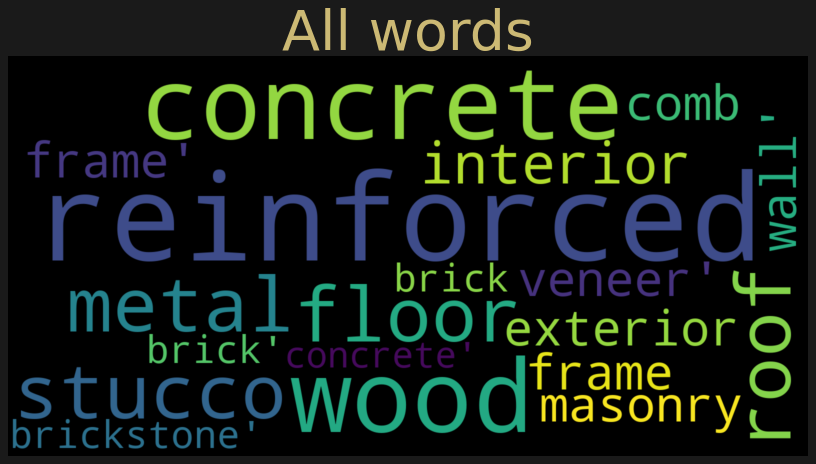

In [37]:
#wordCloud is a technique to show which words are the most frequent among the given text. We use word cloud here to see which ingredients are most frequently used in a cuisine.
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS

print("Word Cloud Function..")
stopwords = set(STOPWORDS)
size = (20,20)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Data Set for Word Clouds
cloud(df['letter_count'].values, title="All words", size=[10,10])

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df['letter_count']).toarray()
labels = df["Construction Code"]
features.shape

(1502, 277)

In [39]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for category_id in sorted(df["Construction Code"].unique()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("class_label_{}:".format(category_id)) 
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

class_label_1:
  . Most correlated unigrams:
. vinyl
. wood
  . Most correlated bigrams:
. wood frame
. frame stucco
class_label_2:
  . Most correlated unigrams:
. jm
. wood
  . Most correlated bigrams:
. wood frame
. joisted masonry
class_label_3:
  . Most correlated unigrams:
. preengineered
. metal
  . Most correlated bigrams:
. steel frame
. frame exterior
class_label_4:
  . Most correlated unigrams:
. resistive
. wood
  . Most correlated bigrams:
. masonry steel
. wood frame
class_label_5:
  . Most correlated unigrams:
. modified
. mod
  . Most correlated bigrams:
. structural steel
. resistive modified
class_label_6:
  . Most correlated unigrams:
. poured
. resistive
  . Most correlated bigrams:
. poured concrete
. resistive concrete
class_label_Unknown:
  . Most correlated unigrams:
. parking
. buildings
  . Most correlated bigrams:
. wood frame
. steel frame


In [40]:
from collections import Counter

def word_freq(clean_text_list, top_n):
    """
    Word Frequency
    """
    flat = [item for sublist in clean_text_list for item in sublist]
    with_counts = Counter(flat)
    top = with_counts.most_common(top_n)
    word = [each[0] for each in top]
    num = [each[1] for each in top]
    return pd.DataFrame([word, num]).T

In [41]:
#Top 20 most frequent words for all the Construction Description 

cl_text_list = df["Clean_text"].tolist()
wf = word_freq(cl_text_list, 20)
wf.head(20)

,0,1
0,concrete,494
1,steel,425
2,frame,303
3,masonry,259
4,wood,193
5,brick,186
6,metal,184
7,block,136
8,roof,105
9,fire,104


In [42]:
#Avg word count by category
def word_count(text):
    return len(str(text).split(' '))

    
df["word_count"] = df["Clean_text"].apply(word_count)
avg_wc = df.groupby("Construction Code").mean().reset_index()
avg_wc[["Construction Code","word_count"]]

,Construction Code,word_count
0,1,3.630952
1,2,3.680851
2,3,3.690355
3,4,4.216570
4,5,3.861538
5,6,4.207921
6,Unknown,17.000000


In [43]:
from gensim.models import Phrases
def word_freq_bigrams(clean_text_list, top_n):
    
    """
    Word Frequency With Bigrams
    """
    bigram_model = Phrases(clean_text_list, min_count=2, threshold=1)
    w_bigrams = list(bigram_model[clean_text_list])
    flat_w_bigrams = [item for sublist in w_bigrams for item in sublist]
    with_counts = Counter(flat_w_bigrams)
    top = with_counts.most_common(top_n)
    word = [each[0] for each in top]
    num = [each[1] for each in top]
    return pd.DataFrame([word, num]).T

In [44]:
#Top 15 words by category. Taking bigrams into account
top_n = 15

#Splitting the df into the different categories
df_label_1 = df.loc[df["Construction Code"] == "1"] 
df_label_2 = df.loc[df["Construction Code"] == "2"]
df_label_3 = df.loc[df["Construction Code"] == "3"] 
df_label_4 = df.loc[df["Construction Code"] == "4"]
df_label_5 = df.loc[df["Construction Code"] == "5"]
df_label_6 = df.loc[df["Construction Code"] == "6"]
df_label_7 = df.loc[df["Construction Code"] == "Unknown"]

text_label_1 = df_label_1["Clean_text"].tolist()
text_label_2 = df_label_2["Clean_text"].tolist()
text_label_3 = df_label_3["Clean_text"].tolist()
text_label_4 = df_label_4["Clean_text"].tolist()
text_label_5 = df_label_5["Clean_text"].tolist()
text_label_6 = df_label_6["Clean_text"].tolist()
text_label_Unknown = df_label_1["Clean_text"].tolist()

class_1 = word_freq_bigrams(text_label_1, top_n=top_n)
class_2 = word_freq_bigrams(text_label_2, top_n=top_n)
class_3 = word_freq_bigrams(text_label_3, top_n=top_n)
class_4 = word_freq_bigrams(text_label_4, top_n=top_n)
class_5 = word_freq_bigrams(text_label_5, top_n=top_n)
class_6 = word_freq_bigrams(text_label_6, top_n=top_n)
class_Unknown = word_freq_bigrams(text_label_Unknown, top_n=top_n)

df_wf = pd.concat([class_1, class_2, class_3, class_4, class_5, class_6, class_Unknown ], axis=1)
cols = ['class_1', 'count', 'class_2','count', 'class_3','count', 'class_4', 'count','class_5','count', 'class_6', 'count','class_Unknown', 'count']
df_wf.columns = cols


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [45]:
df_wf

,class_1,count,class_2,count,class_3,count,class_4,count,class_5,count,class_6,count,class_Unknown,count
0,wood,42,brick,54,steel_frame,40,concrete,154,concrete,12,fire_resistive,43,wood,42
1,frame,29,masonry,51,metal,37,steel,121,structural_steel,12,concrete,18,frame,29
2,wood_frame,28,wood,39,steel,36,masonry,71,modified,10,reinforced_concrete,16,wood_frame,28
3,stucco,18,wood_frame,32,exterior,24,brick,50,steel,8,fire,16,stucco,18
4,steel,14,concrete,30,glass,14,metal,49,fire_resistive,8,poured_concrete,10,steel,14
5,roof,14,frame,30,concrete,11,steel_frame,48,modified_fire,8,frame,9,roof,14
6,metal,9,roof,21,roof,11,concrete_block,41,resistive,8,roof,8,metal,9
7,floor,7,concrete_slab,17,noncombustible,11,block,40,mod_fire,6,fr,8,floor,7
8,concrete,7,steel,16,concrete_slab,10,reinforced_concrete,38,modified_fr,5,precast_concrete,8,concrete,7
9,veneer,6,joisted_masonry,13,metal_frame,10,masonry_steel,38,mod_fr,5,iso,7,veneer,6


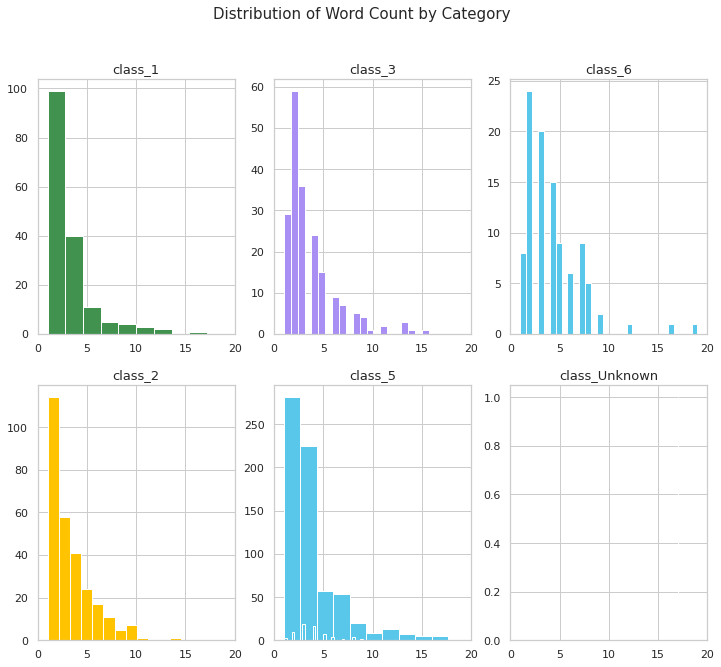

In [46]:
#Plot the distribution of word count by article

fig, ax = plt.subplots(2, 3, figsize = (12,10))
fig.suptitle('Distribution of Word Count by Category', fontsize=15)

bins = 30

ax[0, 0].hist(df_label_1["word_count"], bins = bins, color = '#41924F')
ax[0, 0].set_title("class_1", fontsize = 13)
ax[0, 0].set_xlim(0, 20)

ax[1, 0].hist(df_label_2["word_count"], bins = bins, color = '#FFC300')
ax[1, 0].set_title("class_2", fontsize = 13)
ax[1, 0].set_xlim(0, 20)

ax[0, 1].hist(df_label_3["word_count"], bins = bins, color = '#a98ff3')
ax[0, 1].set_title("class_3", fontsize = 13)
ax[0, 1].set_xlim(0, 20)

ax[1, 1].hist(df_label_4["word_count"], bins = bins, color = '#59C7EA')
ax[1, 1].set_title("class_4", fontsize = 13)
ax[1, 1].set_xlim(0, 20)

ax[1, 1].hist(df_label_5["word_count"], bins = bins, color = '#59C7EA')
ax[1, 1].set_title("class_5", fontsize = 13)
ax[1, 1].set_xlim(0, 20)

ax[0, 2].hist(df_label_6["word_count"], bins = bins, color = '#59C7EA')
ax[0, 2].set_title("class_6", fontsize = 13)
ax[0, 2].set_xlim(0, 20)

ax[1, 2].hist(df_label_7["word_count"], bins = bins, color = '#59C7EA')
ax[1, 2].set_title("class_Unknown", fontsize = 13)
ax[1, 2].set_xlim(0, 20)

plt.show()

In [47]:
df_label_7.head()

,Construction Description,Construction Code,Clean_text,count_of_words,letter_count,word_count
1481,THIS LOCATION IS ACTUALLY TWO BUILDINGS OF MIX...,Unknown,"[this, location, is, actually, two, buildings,...",17,this location is actually two buildings of mix...,17


In [50]:
!pip install tokenizer

In [48]:
#####  Data prep & LSTM Modeling starts from here #####
import tokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [49]:
# The max number of words to be used
MAX_NB_WORDS = 5000

In [50]:
df.head(1)

,Construction Description,Construction Code,Clean_text,count_of_words,letter_count,word_count
0,"metal roof, wood floors, stucco interior and e...",1,"[metal, roof, wood, floor, stucco, interior, e...",8,metal roof wood floor stucco interior exterior...,8


In [51]:
# Max number of words in each description.
MAX_SEQUENCE_LENGTH = 100

In [52]:
# This is fixed.
EMBEDDING_DIM = 64
tokenizer = Tokenizer(num_words = MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Clean_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 859 unique tokens.


In [53]:
X = tokenizer.texts_to_sequences(df['Construction Description'].values)
X = pad_sequences(X, maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1502, 100)


In [54]:
### Encode lables
Y = pd.get_dummies(df['Construction Code']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1502, 7)


In [55]:
### Split the data into train & test 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1201, 100) (1201, 7)
(301, 100) (301, 7)


In [56]:
### LSTM model fitting
import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import SpatialDropout1D
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [57]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout = 0.3, recurrent_dropout = 0.2))
model.add(Dense(7, activation = 'softmax'))
opt = keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [58]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           320000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 64)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 7)                 455       
Total params: 353,479
Trainable params: 353,479
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
filepath = "/content/drive/My Drive/lstm assginemtn/final_4/" + "LSTM_{val_accuracy:.2f}.hdf5"

In [60]:
checkpoint = [ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only = True, save_weights_only = True, mode = 'auto'), 
                              ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_delta = 0.0001,patience = 2), 
                               ]
callbacks_list = checkpoint

Saving the model best weights and changing the learning rate for every 2 epochs if loss variation is less 


In [61]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 2 , validation_split = 0.1, callbacks = callbacks_list)

Epoch 1/10
540/540 [==============================] - 74s 133ms/step - loss: 1.5349 - accuracy: 0.4554 - val_loss: 1.1736 - val_accuracy: 0.5289

Epoch 00001: val_accuracy improved from -inf to 0.52893, saving model to /content/drive/My Drive/lstm assginemtn/final_4/LSTM_0.53.hdf5
Epoch 2/10
540/540 [==============================] - 72s 134ms/step - loss: 0.9490 - accuracy: 0.6463 - val_loss: 0.8750 - val_accuracy: 0.6612

Epoch 00002: val_accuracy improved from 0.52893 to 0.66116, saving model to /content/drive/My Drive/lstm assginemtn/final_4/LSTM_0.66.hdf5
Epoch 3/10
540/540 [==============================] - 72s 133ms/step - loss: 0.6467 - accuracy: 0.7662 - val_loss: 0.9408 - val_accuracy: 0.6694

Epoch 00003: val_accuracy improved from 0.66116 to 0.66942, saving model to /content/drive/My Drive/lstm assginemtn/final_4/LSTM_0.67.hdf5
Epoch 4/10
540/540 [==============================] - 72s 133ms/step - loss: 0.4851 - accuracy: 0.8288 - val_loss: 0.7201 - val_accuracy: 0.7355

Ep

In [62]:
# Accuracy
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format( accr[0] , (accr[1]) * 100))


##### End of model training #####

10/10 [==============================] - 0s 23ms/step - loss: 0.7506 - accuracy: 0.7841
Test set
  Loss: 0.751
  Accuracy: 78.405


In [63]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


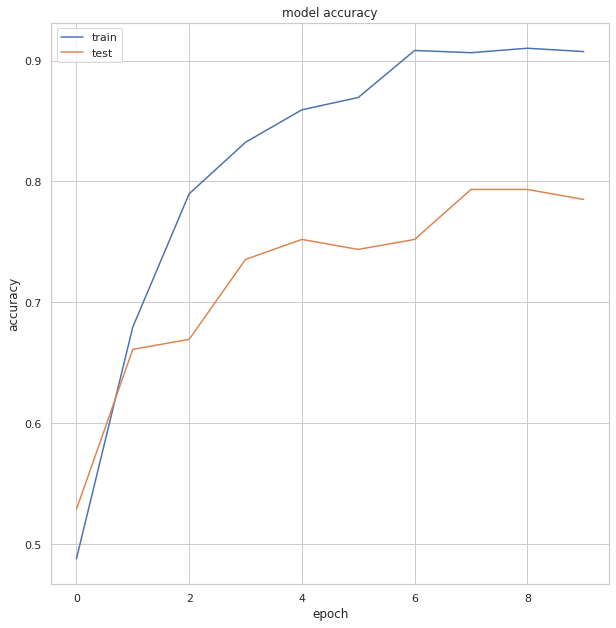

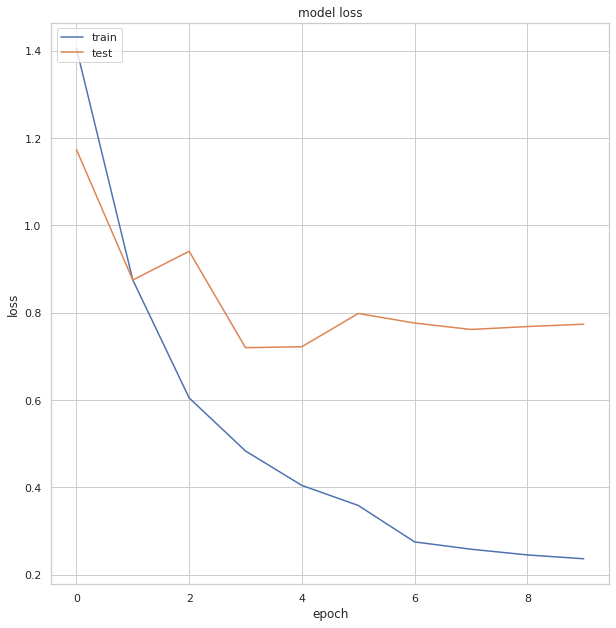

In [64]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
y_pred = model.predict_classes(X_test, batch_size = 2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [66]:
y_pred

array([0, 0, 3, 1, 2, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 3, 0, 3, 3, 0, 5, 3,
       5, 3, 0, 3, 3, 3, 2, 3, 3, 3, 4, 3, 1, 3, 2, 0, 0, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 5, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 5, 0, 2, 2, 2,
       1, 0, 4, 2, 1, 1, 3, 2, 3, 3, 2, 0, 1, 1, 3, 1, 5, 3, 2, 3, 1, 3,
       3, 3, 1, 2, 3, 3, 0, 3, 2, 3, 1, 3, 5, 5, 3, 3, 0, 3, 2, 0, 2, 3,
       3, 3, 3, 1, 0, 3, 0, 1, 3, 2, 2, 3, 3, 3, 1, 4, 2, 1, 2, 3, 1, 1,
       1, 3, 0, 3, 1, 2, 2, 3, 2, 3, 3, 0, 2, 1, 5, 0, 3, 1, 3, 3, 2, 2,
       3, 3, 3, 2, 3, 3, 2, 0, 1, 2, 3, 0, 3, 2, 3, 3, 0, 2, 3, 3, 4, 2,
       3, 2, 0, 1, 3, 4, 1, 0, 2, 2, 1, 2, 3, 2, 1, 1, 2, 3, 3, 1, 3, 2,
       0, 3, 5, 1, 3, 3, 1, 2, 3, 0, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 0, 0, 3, 3, 3, 1, 3, 2, 3, 1, 1, 3, 3, 1, 1,
       3, 3, 3, 1, 1, 3, 2, 5, 0, 1, 1, 2, 3, 3, 3, 3, 2, 3, 3, 2, 0, 0,
       1, 1, 3, 0, 1, 5, 3, 0, 3, 5, 3, 3, 1, 3, 3, 3, 0, 4, 3, 0, 2, 3,
       5, 3, 3, 3, 3, 3, 3, 0, 2, 5, 3, 3, 0, 1, 0]

In [67]:
import numpy as np
y_labels = np.argmax(Y_test , axis = 1)

In [68]:
y_labels

array([0, 0, 3, 1, 4, 3, 3, 3, 3, 1, 3, 1, 3, 0, 5, 3, 0, 3, 3, 1, 5, 3,
       5, 3, 0, 3, 3, 3, 3, 3, 3, 1, 4, 3, 1, 3, 3, 0, 0, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 5, 1, 3, 3, 3, 2, 3, 3, 2, 3, 1, 2, 3, 5, 2, 2, 3, 1,
       1, 1, 4, 2, 3, 1, 3, 2, 3, 3, 5, 0, 1, 3, 1, 3, 2, 3, 2, 3, 3, 0,
       2, 1, 3, 2, 0, 3, 0, 3, 2, 3, 1, 3, 5, 5, 3, 3, 0, 2, 2, 0, 2, 5,
       5, 3, 3, 2, 0, 2, 0, 1, 3, 2, 2, 3, 3, 3, 1, 4, 2, 3, 0, 3, 1, 1,
       1, 3, 0, 3, 1, 1, 2, 3, 3, 3, 3, 0, 2, 3, 5, 0, 3, 1, 3, 3, 1, 2,
       3, 4, 3, 2, 3, 3, 3, 0, 1, 2, 3, 0, 3, 3, 3, 3, 0, 4, 3, 3, 4, 2,
       3, 2, 1, 1, 1, 4, 3, 0, 2, 2, 1, 3, 5, 2, 3, 1, 2, 3, 3, 1, 3, 2,
       0, 3, 5, 1, 3, 3, 1, 2, 3, 0, 2, 3, 3, 3, 3, 3, 1, 2, 3, 5, 2, 1,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 1, 3, 2, 3, 1, 1, 1, 3, 1, 1,
       2, 3, 0, 1, 1, 3, 2, 2, 0, 1, 1, 2, 3, 3, 3, 3, 2, 3, 3, 2, 0, 3,
       1, 1, 3, 3, 1, 5, 3, 0, 3, 1, 3, 3, 1, 3, 3, 3, 0, 3, 3, 0, 2, 3,
       5, 3, 3, 3, 6, 3, 3, 1, 2, 5, 3, 3, 0, 1, 0]

In [69]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_labels, y_pred)

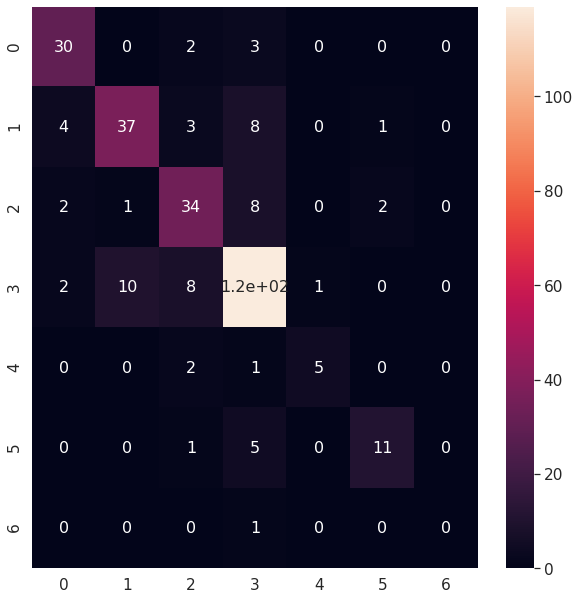

In [71]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, range(7), range(7))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [74]:
model_json = model.to_json()
with open("/content/drive/My Drive/lstm assginemtn/final_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/lstm assginemtn/final_model.h5")
print("Saved model to disk")

Saved model to disk
